
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **DATA AUGMENTATION!** </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

## **Outline**
1. **Pre-trained CNN Models**
2. **Most common CNN architectures**
3. **Transfer Lerning: using pre-trained DL models**



In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA2


In [ ]:
#@title 1. Professor: MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/main/academic/courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-professor/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/main/academic/courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-professor


In [ ]:
#@title Load libraries { display-mode: "form" }
#@markdown Here is important to change to GPU  

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

2.3.0


#**DATA AUGMENTATION**

To augment the dataset allows to enrich the representation from training data, and allows to avoid some typical variance souces. The actual transformation are rotation, crop, shifts, shear, zoom, flip, reflection, normalization . For doing so, `ImageDataGenerator` class allows to generate batches of image data. 


In [ ]:
#@title **code:**  Load cifar 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print ("CIFAR 10")
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [ ]:
#@title **code** organize data
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000 y_train: (50000, 10)
Number of images in x_test 10000 y_test:  (10000, 10)


In [ ]:
#@title **code** ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen_cifar = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, rotation_range=45, horizontal_flip=True)
datagen_cifar.fit(x_train)

`Flow` method allows to take input data, with respective labels $(x_i, y_i)$ and generate augmented and normalized (featurewise) data. We can emulate some set of batches to see the data generaction in action:

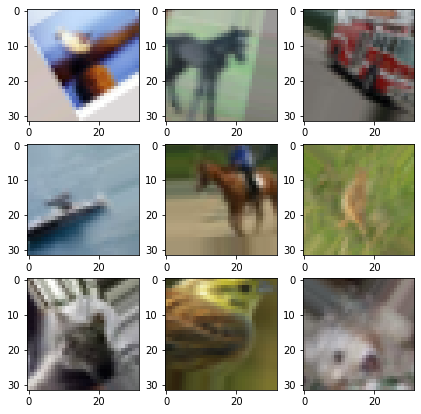

In [ ]:
#@title **code** To visualize some transformed data
plt.figure(figsize=(7,7));
plt.xticks([]);
plt.yticks([]);
plt.grid(False);

for X_batch, y_batch in datagen_cifar.flow(x_train, y_train, batch_size=9):
    for i in range(9):
      plt.subplot(330 + 1 + i)
      plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.cm.binary);
    plt.show()
    break

If you want to save the generated images, then on the flow method of image generator you can pass such information, as: 

mkdir: cannot create directory ‘data/f_aug’: File exists


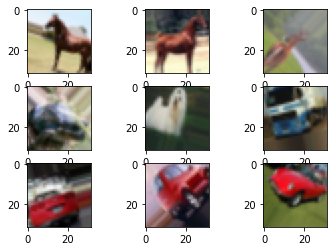

In [ ]:
#@title **code** To save augmented data
!mkdir data/f_aug

for X_batch, y_batch in datagen_cifar.flow(x_train, y_train, batch_size=9, save_to_dir='data/f_aug', save_prefix='aug', save_format='png'):
  for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.cm.binary);
  plt.show()
  break

#2. **Training with data augmentation**

In [ ]:
#@title **code** define a CNN
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Flatten())
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
#@title **code** Train model with generated data
it_train = datagen_cifar.flow(x_train, y_train, batch_size=64)

learning_rate= 0.001
opt = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9)
model_in_do_ba.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_in_do_ba.fit(it_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 26s 33ms/step - loss: 1.9511 - accuracy: 0.2887 - val_loss: 1.5537 - val_accuracy: 0.4375
Epoch 2/20
782/782 [==============================] - 25s 33ms/step - loss: 1.6980 - accuracy: 0.3813 - val_loss: 1.5583 - val_accuracy: 0.4544
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 1.5966 - accuracy: 0.4152 - val_loss: 1.5498 - val_accuracy: 0.4498
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 1.5234 - accuracy: 0.4478 - val_loss: 1.5575 - val_accuracy: 0.4674
Epoch 5/20
782/782 [==============================] - 26s 33ms/step - loss: 1.4749 - accuracy: 0.4650 - val_loss: 1.5530 - val_accuracy: 0.4709
Epoch 6/20
782/782 [==============================] - 25s 33ms/step - loss: 1.4306 - accuracy: 0.4805 - val_loss: 1.5694 - val_accuracy: 0.4691
Epoch 7/20
782/782 [==============================] - 26s 33ms/step - loss: 1.3886 - accuracy: 0.4968 - val_loss: 1.5379 - val_accuracy:

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Propose a CNN, use all possible tricks and data augmentation. 
- Test over CIFAR-100

# 3. **Transfer learning together with data augmentation**

In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

In [ ]:
#@title **code** create some layers to add 
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [ ]:
#@title **code** we adapt the pre-trained model in a new model

model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** summary of the models and layers to train
model_B_on_A.summary()
print("number of layers to train: ", len(model_B_on_A.trainable_variables))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
number of layers to train:  2


In [ ]:
#@title **code** Now  we fit the model to the new dataset
it_train = datagen_cifar.flow(x_train, y_train, batch_size=64)

learning_rate= 0.1
opt = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(it_train, epochs=20, validation_data=(x_test, y_test))


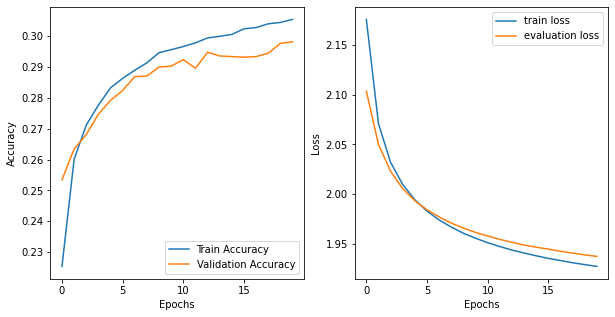

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Fine tunning**



In [ ]:
#@title **code** we unfreeze layers to re-train "a little" the network
model_A.trainable = True
print("Total ayers of Mobilenet: ", len(model_A.layers))
for layer in model_A.layers[:100]:
  layer.trainable =  False
print("Total ayers of Mobilenet: ", len(model_A.layers))

Total ayers of Mobilenet:  155
Total ayers of Mobilenet:  155


In [ ]:
#@title **code** number of layers to train now, did you see?
model_B_on_A.summary()
len(model_B_on_A.trainable_variables)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 1,875,402
Non-trainable params: 395,392
_________________________________________________________________


58

In [ ]:
#@title **code** no we  fin tune the model
opt = tf.keras.optimizers.SGD(lr=learning_rate/10, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))


In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Adapting net: adding , training and freezing specific layers**


In [ ]:
#@title **code** we can change as we want the net, for instance adding new layers 
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(10, activation='softmax')

In [ ]:
#@title **code** we contruct and define which layers to train
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_B_on_A.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,620,106
Trainable params: 362,122
Non-trainable params: 2,257,984
_________________________________________________________________


6

In [ ]:
#@title **code** 1. first to learn FC 

opt = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))


In [ ]:
#@title **code** 2. Now, fine-tune other layers

model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
#for layer in model_A.layers[:100]:
#  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total ayers of model_B_on_A:  155
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,620,106
Trainable params: 2,585,994
Non-trainable params: 34,112
_________________________________________________________________


162

In [ ]:
#@title **code**  compile the model

opt = tf.keras.optimizers.SGD(lr=learning_rate/500, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=30,verbose=1, batch_size=32,validation_data=(x_test, y_test))


In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Try with  other architecture
   
- Use Transfer learning for CIFAR-100

- Discuss about the best configuration to use data augmentation with transfer learning. 

- Implement the same scheme in  third point  of proposed task



Go a head!


# References

[1. A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[2. Popular networks](https://neurohive.io/en/popular-networks/vgg16/)

[3. Keras applications](https://keras.io/applications/)

[4. A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">